In [2]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [3]:
import lightgbm as lgb
from sklearn import svm
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,precision_score,recall_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
fp='C:\\Users\\Jagadeesh\\OneDrive\\Desktop\\Project\\Parkinson-disease-detection-main\\Parkinson-disease-detection-main\\parkinsons.csv'
parkinson_data = pd.read_csv(fp)

In [8]:
parkinson_data.head().head()

,name,MDVP_Fo_Hz,MDVP_Fhi_Hz,MDVP_Flo_Hz,MDVP_Jitter_percentage,MDVP_Jitter_Abs,MDVP_RAP,MDVP_PPQ,Jitter_DDP,MDVP_Shimmer,...,Shimmer_DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [9]:
parkinson_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    195 non-null    object 
 1   MDVP_Fo_Hz              195 non-null    float64
 2   MDVP_Fhi_Hz             195 non-null    float64
 3   MDVP_Flo_Hz             195 non-null    float64
 4   MDVP_Jitter_percentage  195 non-null    float64
 5   MDVP_Jitter_Abs         195 non-null    float64
 6   MDVP_RAP                195 non-null    float64
 7   MDVP_PPQ                195 non-null    float64
 8   Jitter_DDP              195 non-null    float64
 9   MDVP_Shimmer            195 non-null    float64
 10  MDVP_Shimmer_dB         195 non-null    float64
 11  Shimmer_APQ3            195 non-null    float64
 12  Shimmer_APQ5            195 non-null    float64
 13  MDVP_APQ                195 non-null    float64
 14  Shimmer_DDA             195 non-null    fl

In [10]:
parkinson_data.isna().sum()

name                      0
MDVP_Fo_Hz                0
MDVP_Fhi_Hz               0
MDVP_Flo_Hz               0
MDVP_Jitter_percentage    0
MDVP_Jitter_Abs           0
MDVP_RAP                  0
MDVP_PPQ                  0
Jitter_DDP                0
MDVP_Shimmer              0
MDVP_Shimmer_dB           0
Shimmer_APQ3              0
Shimmer_APQ5              0
MDVP_APQ                  0
Shimmer_DDA               0
NHR                       0
HNR                       0
status                    0
RPDE                      0
DFA                       0
spread1                   0
spread2                   0
D2                        0
PPE                       0
dtype: int64

In [11]:
parkinson_data.describe()

,MDVP_Fo_Hz,MDVP_Fhi_Hz,MDVP_Flo_Hz,MDVP_Jitter_percentage,MDVP_Jitter_Abs,MDVP_RAP,MDVP_PPQ,Jitter_DDP,MDVP_Shimmer,MDVP_Shimmer_dB,...,Shimmer_DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [12]:
parkinson_data.columns

Index(['name', 'MDVP_Fo_Hz', 'MDVP_Fhi_Hz', 'MDVP_Flo_Hz',
       'MDVP_Jitter_percentage', 'MDVP_Jitter_Abs', 'MDVP_RAP', 'MDVP_PPQ',
       'Jitter_DDP', 'MDVP_Shimmer', 'MDVP_Shimmer_dB', 'Shimmer_APQ3',
       'Shimmer_APQ5', 'MDVP_APQ', 'Shimmer_DDA', 'NHR', 'HNR', 'status',
       'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [13]:
parkinson_data.duplicated().sum()

0

In [14]:
parkinson_data["status"].value_counts()

1    147
0     48
Name: status, dtype: int64

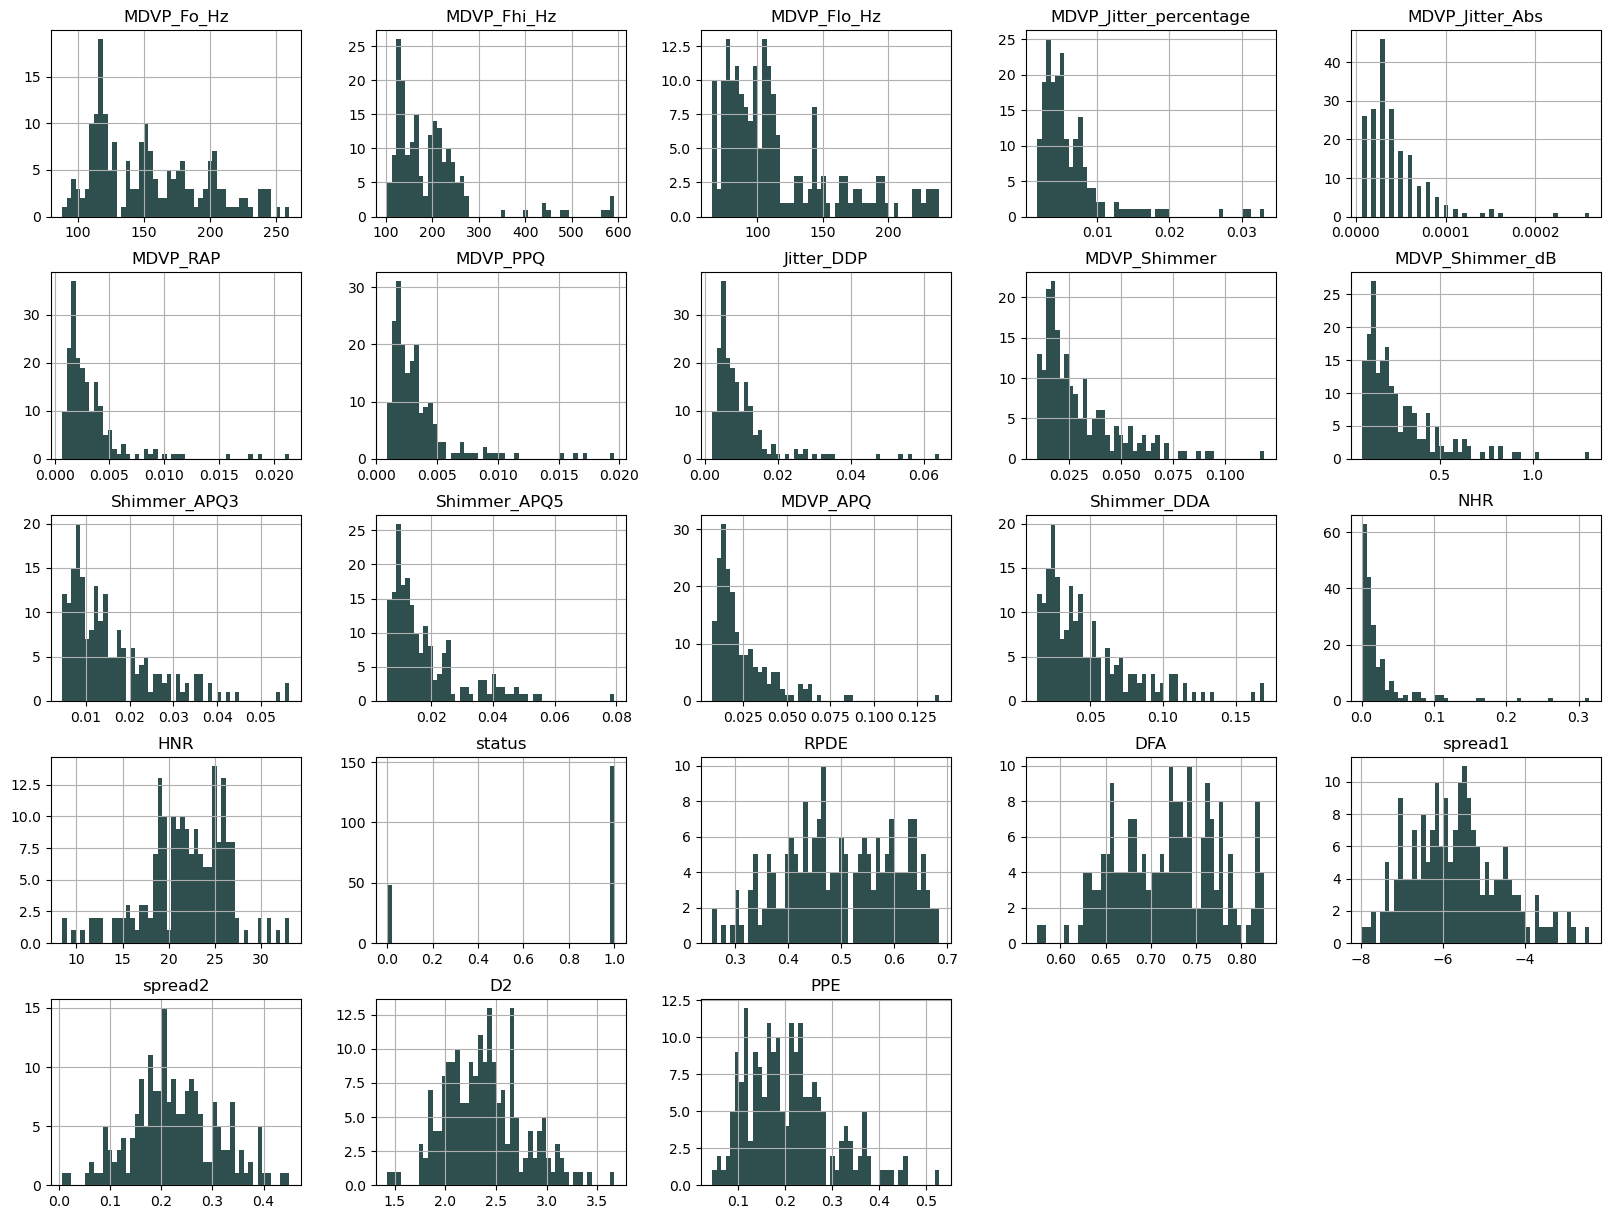

In [15]:
parkinson_data.hist(bins=50, figsize =(20,15), color = 'darkslategrey')
plt.show(block=False)

                        MDVP_Fo_Hz  MDVP_Fhi_Hz  MDVP_Flo_Hz  \
MDVP_Fo_Hz                1.000000     0.400985     0.596546   
MDVP_Fhi_Hz               0.400985     1.000000     0.084951   
MDVP_Flo_Hz               0.596546     0.084951     1.000000   
MDVP_Jitter_percentage    0.118003     0.102086     0.139919   
MDVP_Jitter_Abs           0.382027     0.029198     0.277815   
MDVP_RAP                  0.076194     0.097177     0.100519   
MDVP_PPQ                  0.112165     0.091126     0.095828   
Jitter_DDP                0.076213     0.097150     0.100488   
MDVP_Shimmer              0.098374     0.002281     0.144543   
MDVP_Shimmer_dB           0.073742     0.043465     0.119089   
Shimmer_APQ3              0.094717     0.003743     0.150747   
Shimmer_APQ5              0.070682     0.009997     0.101095   
MDVP_APQ                  0.077774     0.004937     0.107293   
Shimmer_DDA               0.094732     0.003733     0.150737   
NHR                       0.021981     0

<AxesSubplot:>

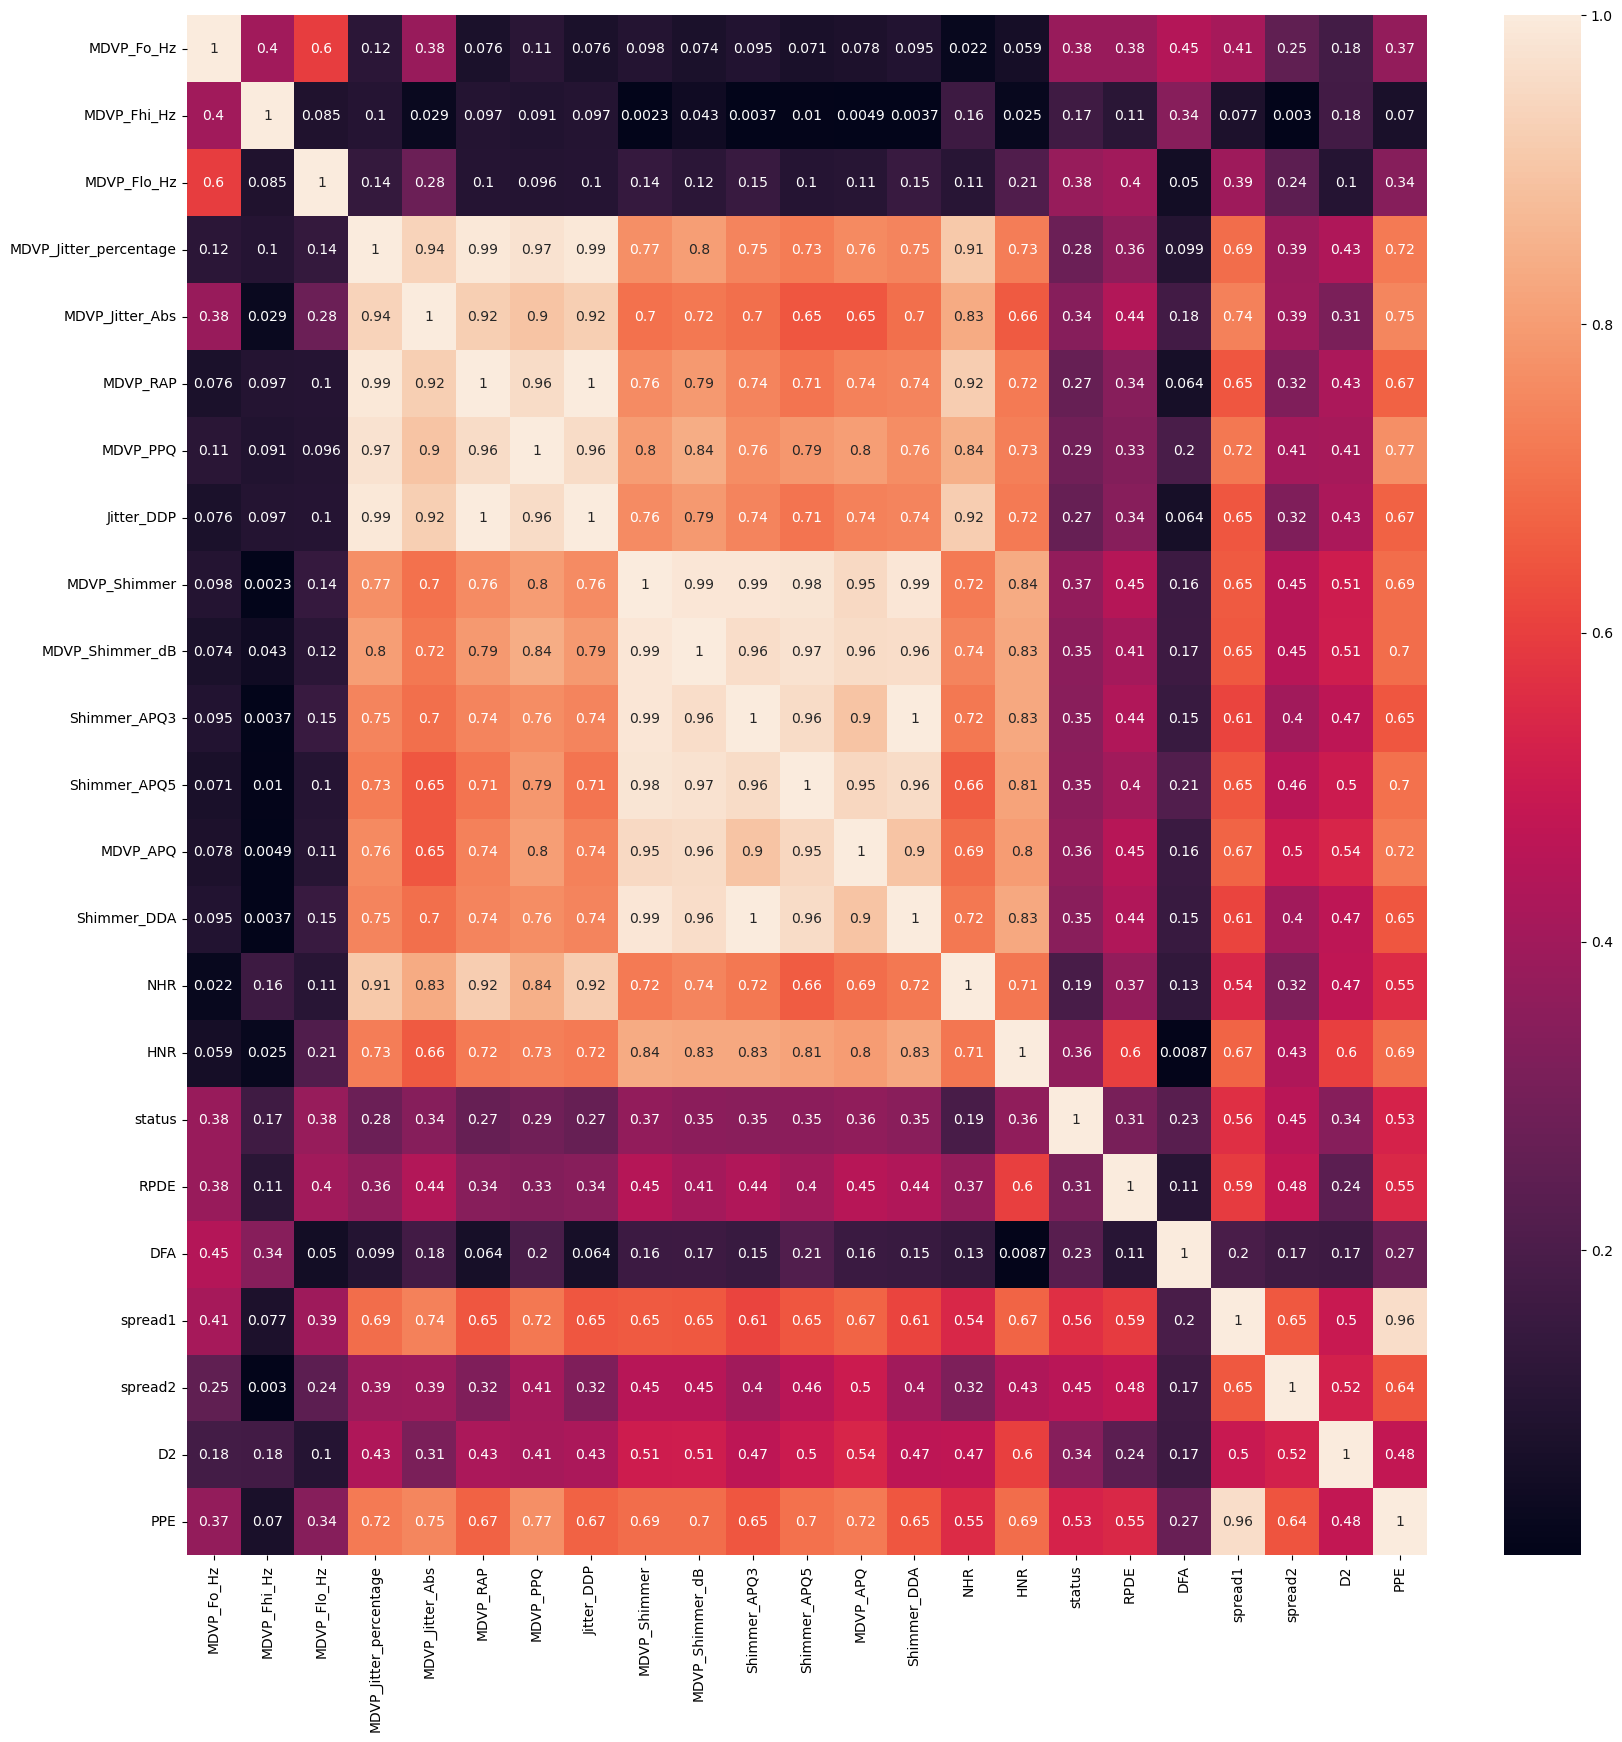

In [16]:
cor_matrix = parkinson_data.corr().abs()
plt.figure(figsize=(20,20))
print(cor_matrix)
sns.heatmap(cor_matrix,annot=True)

In [17]:
X = parkinson_data.drop(columns=['status','name'], axis=1)
Y = parkinson_data['status']

In [18]:
parkinson_data = pd.DataFrame(X)
print(parkinson_data.head())

   MDVP_Fo_Hz  MDVP_Fhi_Hz  MDVP_Flo_Hz  MDVP_Jitter_percentage  \
0     119.992      157.302       74.997                 0.00784   
1     122.400      148.650      113.819                 0.00968   
2     116.682      131.111      111.555                 0.01050   
3     116.676      137.871      111.366                 0.00997   
4     116.014      141.781      110.655                 0.01284   

   MDVP_Jitter_Abs  MDVP_RAP  MDVP_PPQ  Jitter_DDP  MDVP_Shimmer  \
0          0.00007   0.00370   0.00554     0.01109       0.04374   
1          0.00008   0.00465   0.00696     0.01394       0.06134   
2          0.00009   0.00544   0.00781     0.01633       0.05233   
3          0.00009   0.00502   0.00698     0.01505       0.05492   
4          0.00011   0.00655   0.00908     0.01966       0.06425   

   MDVP_Shimmer_dB  ...  MDVP_APQ  Shimmer_DDA      NHR     HNR      RPDE  \
0            0.426  ...   0.02971      0.06545  0.02211  21.033  0.414783   
1            0.626  ...   0.04368 

In [19]:
df1 =parkinson_data.drop(columns=['MDVP_Fhi_Hz', 'MDVP_Fo_Hz', 'MDVP_Flo_Hz', 'HNR'], axis=1)
print(); print(df1.head())


   MDVP_Jitter_percentage  MDVP_Jitter_Abs  MDVP_RAP  MDVP_PPQ  Jitter_DDP  \
0                 0.00784          0.00007   0.00370   0.00554     0.01109   
1                 0.00968          0.00008   0.00465   0.00696     0.01394   
2                 0.01050          0.00009   0.00544   0.00781     0.01633   
3                 0.00997          0.00009   0.00502   0.00698     0.01505   
4                 0.01284          0.00011   0.00655   0.00908     0.01966   

   MDVP_Shimmer  MDVP_Shimmer_dB  Shimmer_APQ3  Shimmer_APQ5  MDVP_APQ  \
0       0.04374            0.426       0.02182       0.03130   0.02971   
1       0.06134            0.626       0.03134       0.04518   0.04368   
2       0.05233            0.482       0.02757       0.03858   0.03590   
3       0.05492            0.517       0.02924       0.04005   0.03772   
4       0.06425            0.584       0.03490       0.04825   0.04465   

   Shimmer_DDA      NHR      RPDE       DFA   spread1   spread2        D2  \
0      0

In [24]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored  # Import the colored function

def Evaluate_Performance(model, X_train, X_test, Y_train, Y_test):
    model.fit(X_train, Y_train)
    overall_score = cross_val_score(model, X_train, Y_train, cv=10)
    model_score = np.average(overall_score)
    Ypredicted = model.predict(X_test)
    print('-' * 80)
    print("\n • Training Accuracy Score : ", round(model.score(X_train, Y_train) * 100, 2))
    print(f" • Cross Validation Score : {round(model_score * 100, 2)}")
    print(colored(" ❖ Testing Accuracy Score : ", attrs=['bold']),
          colored(f"{round(accuracy_score(Y_test, Ypredicted) * 100, 2)}", color='black', attrs=['bold']))
    print(' • Precision Score is :', round(precision_score(Y_test, Ypredicted) * 100, 2))
    print(' • Recall Score is :', round(recall_score(Y_test, Ypredicted) * 100, 2))
    print(' • F1-Score Score is :', round(f1_score(Y_test, Ypredicted) * 100, 2))
    print('-' * 80)
    conf_matrix = confusion_matrix(Y_test, Ypredicted)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues, annot_kws={"size": 16})
    plt.title('Predicted Labels', y=1.05, fontsize=20, fontfamily='Times New Roman')
    plt.ylabel('True Labels', labelpad=25, fontsize=20, fontfamily='Times New Roman')
    plt.show()



In [23]:
pip install termcolor

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(df1, Y, test_size=0.2, random_state=7)

In [54]:
X_train

,MDVP_Jitter_percentage,MDVP_Jitter_Abs,MDVP_RAP,MDVP_PPQ,Jitter_DDP,MDVP_Shimmer,MDVP_Shimmer_dB,Shimmer_APQ3,Shimmer_APQ5,MDVP_APQ,Shimmer_DDA,NHR,RPDE,DFA,spread1,spread2,D2,PPE
27,0.00496,0.00003,0.00250,0.00275,0.00749,0.01919,0.198,0.00883,0.01144,0.01826,0.02650,0.01328,0.358773,0.726652,-6.271690,0.196102,2.314209,0.162999
40,0.00298,0.00002,0.00165,0.00175,0.00496,0.01495,0.135,0.00774,0.00941,0.01233,0.02321,0.00231,0.326480,0.765623,-6.647379,0.201095,2.374073,0.130554
138,0.00472,0.00004,0.00238,0.00290,0.00715,0.05643,0.517,0.03070,0.03530,0.04451,0.09211,0.02629,0.640945,0.701404,-5.634576,0.306014,2.419253,0.209191
31,0.00241,0.00001,0.00134,0.00138,0.00402,0.01015,0.089,0.00504,0.00641,0.00762,0.01513,0.00167,0.432439,0.742055,-7.682587,0.173319,2.103106,0.068501
150,0.01872,0.00010,0.01075,0.01154,0.03225,0.05830,0.784,0.02699,0.03714,0.06259,0.08096,0.10952,0.507826,0.762726,-4.484303,0.340256,2.958815,0.301487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,0.00248,0.00002,0.00105,0.00136,0.00315,0.01131,0.107,0.00522,0.00659,0.01009,0.01567,0.00495,0.296888,0.722356,-6.878393,0.089267,2.004055,0.113942
151,0.03107,0.00016,0.01800,0.01958,0.05401,0.11908,1.302,0.05647,0.07940,0.13778,0.16942,0.21713,0.625866,0.768320,-2.434031,0.450493,3.079221,0.527367
67,0.00923,0.00007,0.00507,0.00463,0.01520,0.03111,0.308,0.01638,0.01759,0.02603,0.04914,0.02659,0.498133,0.729067,-5.324574,0.205660,2.291558,0.226247
25,0.00633,0.00006,0.00316,0.00375,0.00948,0.03767,0.381,0.01732,0.02245,0.03780,0.05197,0.02887,0.522746,0.737948,-5.571843,0.236853,2.846369,0.219514


In [55]:
X_test

,MDVP_Jitter_percentage,MDVP_Jitter_Abs,MDVP_RAP,MDVP_PPQ,Jitter_DDP,MDVP_Shimmer,MDVP_Shimmer_dB,Shimmer_APQ3,Shimmer_APQ5,MDVP_APQ,Shimmer_DDA,NHR,RPDE,DFA,spread1,spread2,D2,PPE
191,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
120,0.00581,0.00005,0.00241,0.00314,0.00723,0.02008,0.221,0.00849,0.01117,0.01734,0.02548,0.02350,0.487756,0.684130,-6.186128,0.279933,2.686240,0.152428
24,0.00742,0.00005,0.00380,0.00390,0.01140,0.01659,0.164,0.00738,0.00948,0.01497,0.02214,0.01778,0.397937,0.732479,-5.557447,0.220890,2.692176,0.215961
117,0.00555,0.00003,0.00244,0.00261,0.00731,0.01725,0.175,0.00757,0.00971,0.01652,0.02270,0.01802,0.486738,0.676023,-4.597834,0.372114,2.975889,0.282780
2,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
101,0.01551,0.00012,0.00905,0.00909,0.02716,0.06170,0.584,0.03223,0.03672,0.05174,0.09669,0.11843,0.639808,0.643327,-4.202730,0.310163,2.638279,0.356881
104,0.00183,0.00001,0.00076,0.00100,0.00229,0.01030,0.094,0.00469,0.00582,0.00871,0.01406,0.00243,0.263654,0.691483,-7.111576,0.144780,2.065477,0.093193
145,0.00352,0.00002,0.00169,0.00188,0.00506,0.02536,0.225,0.01379,0.01478,0.01909,0.04137,0.01493,0.566849,0.574282,-5.456811,0.345238,2.840556,0.232861
86,0.00321,0.00002,0.00163,0.00194,0.00488,0.03759,0.327,0.02073,0.02415,0.02784,0.06219,0.03151,0.598714,0.712199,-6.366916,0.335753,2.654271,0.144614
22,0.00442,0.00003,0.00220,0.00247,0.00661,0.04351,0.377,0.02228,0.02540,0.04246,0.06685,0.01280,0.619060,0.679834,-4.330956,0.262384,2.916777,0.285695


In [43]:
model = lgb.LGBMClassifier()
model.fit(X_train, Y_train)

[LightGBM] [Info] Number of positive: 115, number of negative: 41
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 905
[LightGBM] [Info] Number of data points in the train set: 156, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.737179 -> initscore=1.031360
[LightGBM] [Info] Start training from score 1.031360
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

LGBMClassifier()

[LightGBM] [Info] Number of positive: 115, number of negative: 41
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000165 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 905
[LightGBM] [Info] Number of data points in the train set: 156, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.737179 -> initscore=1.031360
[LightGBM] [Info] Start training from score 1.031360
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

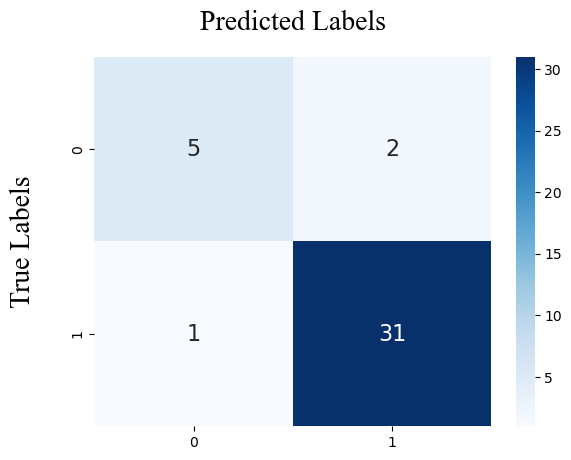

In [44]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
Evaluate_Performance(model, X_train, X_test, Y_train, Y_test)

In [45]:
import pickle

In [46]:
filename = 'trained_modell.pkl'
pickle.dump(model, open(filename, 'wb'))

In [47]:
# loading the saved model
loaded_model = pickle.load(open('trained_modell.pkl', 'rb'))

In [48]:
model1 = svm.SVC(kernel='linear')

In [49]:
model1.fit(X_train, Y_train)

SVC(kernel='linear')

--------------------------------------------------------------------------------

 • Training Accuracy Score :  84.62
 • Cross Validation Score : 84.71
 ❖ Testing Accuracy Score :  87.18
 • Precision Score is : 90.91
 • Recall Score is : 93.75
 • F1-Score Score is : 92.31
--------------------------------------------------------------------------------


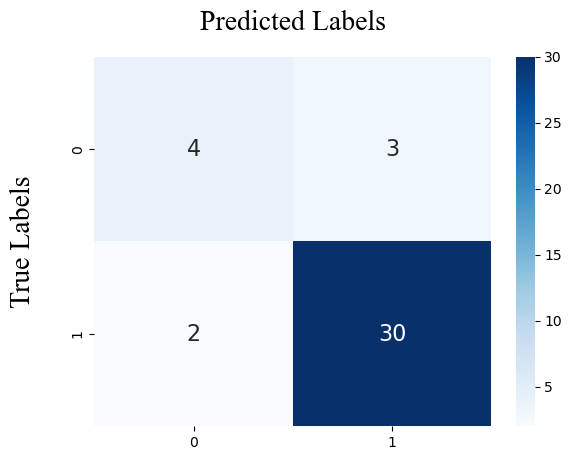

In [50]:
X_train_prediction1 = model1.predict(X_train)
training_data_accuracy1 = accuracy_score(Y_train, X_train_prediction1)
Evaluate_Performance(model1, X_train, X_test, Y_train, Y_test)

In [51]:
model3 = LogisticRegression(solver='liblinear', random_state=0)

In [52]:
model3.fit(X_train, Y_train)

LogisticRegression(random_state=0, solver='liblinear')

--------------------------------------------------------------------------------

 • Training Accuracy Score :  82.69
 • Cross Validation Score : 82.17
 ❖ Testing Accuracy Score :  87.18
 • Precision Score is : 90.91
 • Recall Score is : 93.75
 • F1-Score Score is : 92.31
--------------------------------------------------------------------------------


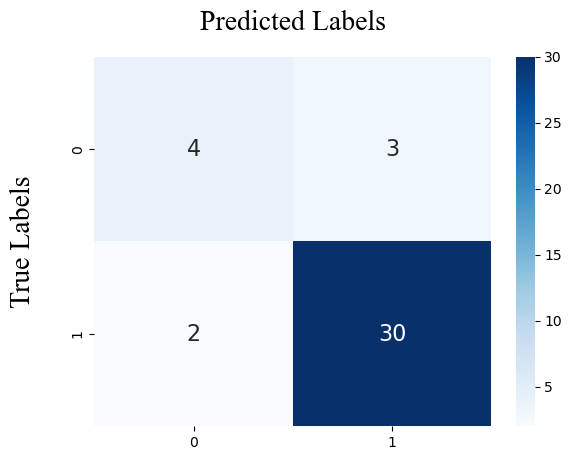

In [53]:
X_train_prediction3 = model3.predict(X_train)
training_data_accuracy3 = accuracy_score(Y_train, X_train_prediction3)
# X_test_prediction3 = model3.predict(X_test)
# test_data_accuracy3 = accuracy_score(Y_test, X_test_prediction3)
Evaluate_Performance(model3, X_train, X_test, Y_train, Y_test)